In [2]:
def valid(lab,x,y,visited):
     return 0 <= x < len(lab[0]) and 0 <= y < len(lab[0]) and [x,y] not in visited and (lab[x][y]==0 or lab[x][y]=='G')

In [3]:
def vecinos(lab,p,visited,n):
    vecinos=[]
    pr=[p[0],p[1]+1]
    pl=[p[0],p[1]-1]
    pu=[p[0]-1,p[1]]
    pd=[p[0]+1,p[1]]
    if pr[1]>=0 and pr[1]<=n and pr[0]>=0 and pr[0]<=n and lab[pr[0]][pr[1]]==0 and pr not in visited:
        vecinos.append(pr)
    if pd[1]>=0 and pd[1]<=n and pd[0]>=0 and pd[0]<=n and lab[pd[0]][pd[1]]==0 and pd not in visited:
        vecinos.append(pd)
    if pl[1]>=0 and pl[1]<=n and pl[0]>=0 and pl[0]<=n and lab[pl[0]][pl[1]]==0 and pl not in visited:
        vecinos.append(pl)
    if pu[1]>=0 and pu[1]<=n and pu[0]>=0 and pu[0]<=n and lab[pu[0]][pu[1]]==0 and pu not in visited:
        vecinos.append(pu)
    
    return vecinos

In [4]:
lab3=[[0,0,0],[1,1,0],[1,1,0]]
lab4=[[0,0,0,0],[1,1,1,0],[0,0,1,0],[0,0,0,0]]
lab5=[[0,0,0,0,0],[1,1,1,1,0],[0,0,1,1,0],[0,0,1,1,0],[0,0,0,0,0]]
lab6=[[0,0,0,0,0,0],[1,1,1,1,1,0],[0,0,1,0,1,0],[0,0,1,0,1,0],[0,0,0,0,1,0],[0,0,0,0,0,0]]
lab7=[[0,0,0,0,0,0,0],[1,1,1,1,1,1,0],[0,0,1,0,0,1,0],[0,0,1,0,0,1,0],[0,0,0,0,0,1,0],[0,0,0,0,0,1,0],[0,0,0,0,0,0,0]]
lab8=[[0,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,0],[0,0,0,1,0,0,1,0],[0,0,0,1,0,0,1,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,1,0]]
lab=[lab3,lab4,lab5,lab6,lab7,lab8]
for i in range(5):
    for j in range(i+3):
        print(lab[i][j])

[0, 0, 0]
[1, 1, 0]
[1, 1, 0]
[0, 0, 0, 0]
[1, 1, 1, 0]
[0, 0, 1, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 0]
[0, 0, 1, 1, 0]
[0, 0, 1, 1, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0]
[0, 0, 1, 0, 1, 0]
[0, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 0, 0, 1, 0]
[0, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0]


In [5]:
def anch(lab,p):
    n=len(lab[0])-1
    f=[]
    cerrados=[]
    abiertos=[p]
    caminos=[[p]]
    while abiertos!=[]:
        #print(1,'cerrados=',cerrados,'abiertos=',abiertos,'caminos=',caminos)
        x=abiertos[0]
        cam=caminos[0]
        for v in vecinos(lab,x,cam,n):
            abiertos.append(v)
            r=[]
            r.extend(cam)
            r.append(v)
            caminos.append(r)
            #print(2,'cerrados=',cerrados,'abiertos=',abiertos,'v=',v,'r=',r,'cam=',cam,'caminos=',caminos)
        cerrados.append(x)
        abiertos.remove(x)
        if abiertos!=[]:
            caminos.remove(cam)
        #print(3,'cam=',cam,'cerrados=',cerrados,'abiertos=',abiertos,'caminos=',caminos)
        for c in caminos:
            if c[-1]==[n,n] and c not in f:
                f.append(c)
    return f

In [18]:
import timeit
tm=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for n in range(50):
    t=[]
    for i in range(5):
        t1=timeit.default_timer()
        anch(lab[i],[0,0])
        t2=timeit.default_timer()
        tm[i].append(t2-t1)
s=[]
for n in range(5):
    q=sum(tm[n])/len(tm[n])
    s.append(q)
print(s)

[0.0001156999999693653, 3.6055999953532594e-05, 0.00030583000005208306, 0.0009235800000533345, 2.7241649820000204]


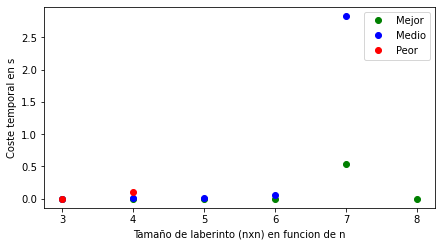

In [40]:
import matplotlib.pyplot as plt
tf=['b',[1.3191999999619952e-05, 4.124400000044659e-05, 8.89259999991765e-05, 0.000952276000000083, 0.539266077, 4.483899999996765e-05],'m',[0.00011923400001705885, 0.0031560420000096203, 0.005138311000000613, 0.060352738999986284, 2.8327079820000245],'w50',[0.00027894599999939374, 0.09676818199999815]]
best=tf[1]
medium=tf[3]
worst=tf[5]
plt.figure(figsize=(7, 3.7))
p1=plt.plot([3, 4, 5, 6, 7, 8], best, 'go', label='Mejor')
p2=plt.plot([3, 4, 5, 6, 7], medium, 'bo', label='Medio')
p3=plt.plot([3, 4], worst, 'ro', label='Peor')
plt.axis()
plt.ylabel('Coste temporal en s')
plt.xlabel('Tamaño de laberinto (nxn) en funcion de n')
plt.legend()
plt.show([p1,p2,p3])

In [ ]:
import timeit
tm=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for n in range(1):
    t=[]
    for i in range(3):
        t1=timeit.default_timer()
        anch(lab[i],[0,0])
        t2=timeit.default_timer()
        tm[i].append(t2-t1)
s=[]
for n in range(6):
    q=sum(tm[n])/len(tm[n])
    s.append(q)
print(s)

In [14]:
lab3=[[0,0,0],[0,0,0],[1,0,0]]
lab4=[[0,0,0,0],[0,1,0,1],[0,1,0,0],[0,1,0,0]]
lab5=[[0,0,0,0,1],[0,1,0,0,0],[0,0,1,0,0],[0,1,1,1,0],[0,0,0,0,0]]
lab6=[[0,0,0,0,0,0],[0,1,0,0,1,0],[0,1,0,0,1,0],[0,1,1,0,0,0],[0,1,1,1,1,0],[0,0,0,0,0,0]]
lab7=[[0,0,0,0,0,0,0],[0,0,0,0,0,1,0],[0,0,0,0,0,1,0],[0,0,1,1,0,1,0],[0,1,0,1,0,0,0],[0,1,1,1,1,1,0],[0,0,0,0,0,0,0]]
lab8=[[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,1,1,1,1,1,1,0],[0,1,1,1,1,1,1,0],[0,1,1,1,1,1,1,0],[0,0,0,0,0,0,0,0]]
lab=[lab3,lab4,lab5,lab6,lab7,lab8]
for i in range(6):
    for j in range(i+3):
        print(lab[i][j])

[0, 0, 0]
[0, 0, 0]
[1, 0, 0]
[0, 0, 0, 0]
[0, 1, 0, 1]
[0, 1, 0, 0]
[0, 1, 0, 0]
[0, 0, 0, 0, 1]
[0, 1, 0, 0, 0]
[0, 0, 1, 0, 0]
[0, 1, 1, 1, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 1, 0]
[0, 1, 0, 0, 1, 0]
[0, 1, 1, 0, 0, 0]
[0, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0]
[0, 0, 1, 1, 0, 1, 0]
[0, 1, 0, 1, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
lab3=[[0,0,0],[0,0,0],[0,0,0]]
lab4=[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
lab5=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
lab6=[[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
lab7=[[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]]
lab8=[[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]]
lab=[lab3,lab4,lab5,lab6,lab7,lab8]
for i in range(6):
    for j in range(len(lab[i])):
        print(lab[i][j])

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
